In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt
import cython
%matplotlib inline

In [6]:
os.getcwd()

'/home/langestrst01/projects/thought_leadership'

In [3]:
%pwd

'/home/langestrst01/projects/thought_leadership'

In [4]:
%ls

Dashboard/  Files Worldbank/                       Notebook - SPSS.ipynb
filescci/   long_CCI.csv                           R_Code/
Files CCI/  Notebook - CCI-high performance.ipynb  README.md
Files EIU/  Notebook - CCI.ipynb                   thought_leadership.Rproj


In [15]:
data = pd.read_csv("long_CCI.csv")

In [9]:
data.head(3)

,Unnamed: 0,region,year,quarter,category,question,question_sub,stat,base,Response,Total,Country,Value,valtype
0,1,AP,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,summary,Base: All Respondents,Base : Unwtd,9563.0,AU,497.0,abs
1,2,AP,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,summary,Base: All Respondents,Base : Wtd(In ' 000),628187.0,AU,16900.0,abs
2,3,AP,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,106.8,AU,109.9,abs


In [10]:
data.columns

Index(['Unnamed: 0', 'region', 'year', 'quarter', 'category', 'question',
       'question_sub', 'stat', 'base', 'Response', 'Total', 'Country', 'Value',
       'valtype'],
      dtype='object')

In [11]:
region = data.region

In [41]:
ccidata = data.loc[data.category=='CCI'].loc[data.stat=='Response']

In [42]:
ccidata = ccidata.loc[data.question=='Index. CONSUMER CONFIDENCE INDEX']

In [43]:
ccidata.head(3)

,Unnamed: 0,region,year,quarter,category,question,question_sub,stat,base,Response,Total,Country,Value,valtype
2,3,AP,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,106.8,AU,109.9,abs
2606,2607,AP,2011,Q2,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,98.1,AU,102.5,abs
2975,2976,AP,2011,Q3,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,96.9,AU,97.3,abs


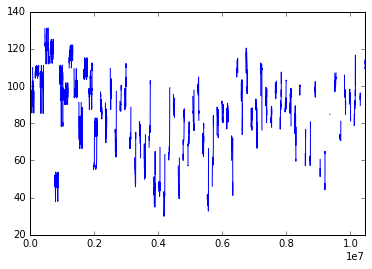

In [39]:
plt.figure()
ccidata.Value.plot()

In [68]:
ccivalue = Series(ccidata.Value, index=ccidata.year)

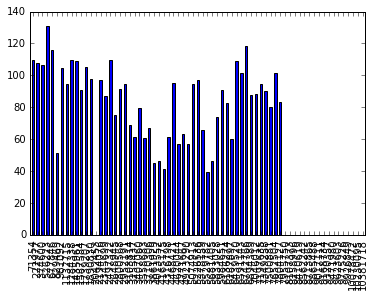

In [151]:
plt.figure()
cciglobal = ccidata[ccidata.region=='GLOBAL']
cci2011 = cciglobal[cciglobal.year==2011]
cci2011Q1 = cci2011[cci2011.quarter=='Q1']
cci2011Q1.Value.plot(kind='bar')

In [99]:
cci2011Q1au

,Unnamed: 0,region,year,quarter,category,question,question_sub,stat,base,Response,Total,Country,Value,valtype
2,3,AP,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,106.8,AU,109.9,abs
71354,71355,GLOBAL,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,92.0,AU,109.9,abs
111496,111497,REGION,2011,Q1,CCI,Index. CONSUMER CONFIDENCE INDEX,None,Response,Base: All Respondents,Average Index,92.0,AU,NaN,abs


In [142]:
data.index

Int64Index([       0,        1,        2,        3,        4,        5,
                   6,        7,        8,        9,
            ...
            10461977, 10461978, 10461979, 10461980, 10461981, 10461982,
            10461983, 10461984, 10461985, 10461986],
           dtype='int64', length=10461987)

In [149]:
data.ix[10461986]

Unnamed: 0                                               10461987
region                                                     REGION
year                                                         2015
quarter                                                        Q4
category                                                      CCI
question        Q16. Which of the following categories best de...
question_sub                                                 None
stat                                                      summary
base                                       Base: All Respondents 
Response                                                     Mean
Total                                                     33144.4
Country                                                       SEA
Value                                                     16094.4
valtype                                                       abs
Name: 10461986, dtype: object

In [4]:
data = data.sort_values(by=['category','question','question_sub','Response',
                    'region','Country','year','quarter'])

In [16]:
dataresp = data[data.stat == 'Response']
dataresp.head(3)
del data

In [17]:
cci_index = dataresp[dataresp.question == 'Index. CONSUMER CONFIDENCE INDEX']
del dataresp

In [10]:
cci_index.tail()

,Unnamed: 0,region,year,quarter,category,question,question_sub,stat,base,Response,Total,Country,Value,valtype
6283879,6283880,SEA,2015,Q3,CCI,Index. CONSUMER CONFIDENCE INDEX,index by sea,Response,Base: All Respondents,Average Index,109.24,UA,NaN,abs
7800109,7800110,SEA,2015,Q3,CCI,Index. CONSUMER CONFIDENCE INDEX,index by sea,Response,Base: All Respondents,Average Index,109.24,US,NaN,abs
8254978,8254979,SEA,2015,Q3,CCI,Index. CONSUMER CONFIDENCE INDEX,index by sea,Response,Base: All Respondents,Average Index,109.24,VE,NaN,abs
1886812,1886813,SEA,2015,Q3,CCI,Index. CONSUMER CONFIDENCE INDEX,index by sea,Response,Base: All Respondents,Average Index,109.24,VN,105.02,abs
6890371,6890372,SEA,2015,Q3,CCI,Index. CONSUMER CONFIDENCE INDEX,index by sea,Response,Base: All Respondents,Average Index,109.24,ZA,NaN,abs


In [18]:
cci_index = cci_index[cci_index.Value.notnull()]

In [19]:
means = cci_index['Value'][cci_index['region']=='AP'].groupby(
    [cci_index['Country'],cci_index['year'],cci_index['quarter']]).mean()

In [22]:
means.index

MultiIndex(levels=[[u'AU', u'CN', u'HK', u'ID', u'IN', u'JP', u'KO', u'MY', u'NZ', u'PH', u'SG', u'TH', u'TW', u'VN'], [2011, 2012, 2013, 2014, 2015], [u'Q1', u'Q2', u'Q3', u'Q4']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,

In [25]:
means.unstack().unstack()

quarter     Q1                                 Q2                         \
year      2011   2012    2013    2014 2015   2011   2012    2013    2014   
Country                                                                    
AU       109.9   94.8   93.45   88.74  NaN  102.5   90.3   97.59   85.49   
CN       107.6  110.4  107.84  110.60  NaN  104.8  105.3  109.64  111.00   
HK       106.7  102.8  107.97  111.15  NaN  107.0  103.5  107.09  102.98   
ID       115.8  118.0  122.15  123.74  NaN  112.2  120.1  123.87  123.00   
IN       130.8  123.4  120.10  120.88  NaN  126.2  118.9  118.46  127.97   
JP         NaN   57.6   72.88   80.91  NaN   55.1   56.5   77.67   72.90   
KO        51.2   48.8   51.26   50.63  NaN   51.9   49.6   51.20   53.00   
MY       104.7  106.6  107.29   92.34  NaN  110.3  111.2  102.95   93.25   
NZ        94.8   90.7   90.02   99.62  NaN   97.0   91.1   93.37   98.73   
PH       109.7  117.7  118.41  115.89  NaN  115.4  116.3  121.42  120.37   
SG       109.3   96.1   95.41   98.90  NaN  102.5   93.9   94.55   98.17   
TH       105.5  106.9  115.22  108.42  NaN  105.2  103.5  114.34  104.99   
TW        91.1   83.7   77.93   75.77  NaN   89.4   71.5   75.17   75.41   
VN        97.5   94.4   95.77   98.75  NaN   97.2   94.6   95.43   97.66   

quarter             Q3                                     Q4                  \
year       2015   2011    2012    2013    2014    2015   2011    2012    2013   
Country                                                                         
AU        88.83   97.3   97.78   96.23   96.50   93.17  102.7   95.14   94.51   
CN       106.83  104.2  105.89  109.58  111.13  106.42  108.0  108.05  110.85   
HK       104.96  103.6   88.85  105.54  107.07   99.17   99.0   85.24  105.31   
ID       120.21  114.0  118.77  119.81  125.17  115.55  116.6  117.15  123.52   
IN       130.62  121.4  118.98  111.81  125.91  130.71  122.2  120.69  115.31   
JP        82.82   56.3   58.88   74.14   76.76   79.70   55.7   58.50   80.48   
KO        45.27   48.6   39.73   53.71   51.66   49.07   45.9   37.97   48.53   
MY        88.53  101.3  104.69  100.99   99.09   78.37  101.0  102.93   98.20   
NZ        99.27   98.0   94.70   96.73  101.73   93.96   90.1   94.20  100.34   
PH       122.05  112.4  117.92  117.90  114.71  117.05  117.4  119.32  113.67   
SG        99.15   94.0   97.60   98.36  103.09  100.85   93.6   94.90   97.09   
TH       110.82  109.1  112.00  111.76  113.13  111.07  104.0  114.57  109.10   
TW        83.85   86.8   69.50   75.92   79.20   72.29   71.3   66.34   72.66   
VN       103.87   95.8   87.44   96.74  101.59  105.02   98.6   88.24   98.28   

quarter                  
year       2014    2015  
Country                  
AU        93.04   96.49  
CN       107.23  107.45  
HK       106.65   99.38  
ID       120.21  114.55  
IN       128.67  131.07  
JP        72.99   79.49  
KO        48.37   45.54  
MY        89.13   80.21  
NZ       101.19   98.77  
PH       119.99  117.35  
SG        99.50   94.43  
TH       110.54  114.49  
TW        76.76   68.72  
VN       105.57  108.22